In [1]:
import pandas as pd
data=pd.read_csv(r'C:\Users\Rajavardhan\Downloads\archive\train.csv')
#data1=pd.read_csv(r'C:\Users\Rajavardhan\Downloads\archive\test.csv')

In [2]:
#frames = [data, data1]
#df = pd.concat(frames)
#df.head()
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [3]:
data.shape

(38932, 5)

In [4]:
data.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id14135,1
Description,38932,38932,From an electricity outage (beyond their contr...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


### Data Cleaning/EDA

In [5]:
#Checking Missing Values in the Data Set and
#Printing the % of missing values for each column
count=data.isnull().sum().sort_values(ascending=False)
percentage=((data.isnull().sum()/len(data)*100)).sort_values(ascending=False)
missing_data=pd.concat([count,percentage],axis=1,
keys=['count','perenctage'])
missing_data

,count,perenctage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


Perecentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


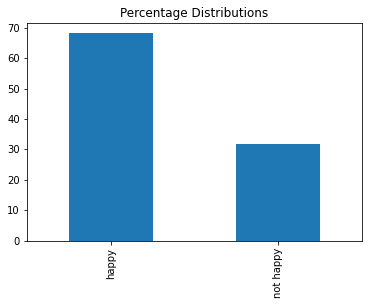

In [6]:
# Checking for Distribution of Default
import matplotlib.pyplot as plt
%matplotlib inline
print('Perecentage for default\n')
print(round(data.Is_Response.value_counts(normalize=True)*100,2))
round(data.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions')
plt.show()

In [7]:
data.columns


Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [8]:
# Removing Columns 
data.drop(columns=['User_ID', 'Browser_Used', 'Device_Used', ], inplace=True)


### Applying First Level Cleaning

In [9]:
import re
import string

In [10]:
# This function converts to lower-case, removes square bracket, removes number ans punctuation
def text_clean_1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','', text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text
cleaned1=lambda x: text_clean_1(x)

In [11]:
# Let's take a look at the updated text
data['cleaned_description']=pd.DataFrame(data.Description.apply(cleaned1))
data.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


### Apply Second Level Cleaning

In [12]:
def text_clean_2(text):
    text=re.sub('[''"",,,]','', text)
    text=re.sub('\n','', text)
    return text
cleaned2=lambda x: text_clean_2(x)

In [13]:
data['cleaned_description_new']=pd.DataFrame(data['cleaned_description'].apply(cleaned2))
data.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


### Model Training

In [14]:
from sklearn.model_selection import train_test_split

Independent_var=data.cleaned_description_new
Dependent_var=data.Is_Response

IV_train,IV_test, DV_train,DV_test=train_test_split(Independent_var,Dependent_var,test_size=0.1,random_state=225)
print('IV_train:',len(IV_train))
print('IV_test:',len(IV_test))
print('DV_train:',len(DV_train))
print('DV_test:',len(DV_test))

IV_train: 35038
IV_test: 3894
DV_train: 35038
DV_test: 3894


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec=TfidfVectorizer()
clf=LogisticRegression(solver='lbfgs')

from sklearn.pipeline import Pipeline

In [16]:
model=Pipeline([('vectorizer',tvec),('classifier',clf)])
model.fit(IV_train,DV_train)

C:\Users\Rajavardhan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [17]:
from sklearn.metrics import confusion_matrix
predictions=model.predict(IV_test)
confusion_matrix(predictions,DV_test)

array([[2417,  304],
       [ 154, 1019]], dtype=int64)

### Model Prediction

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [19]:
print('Accuracy:', accuracy_score(predictions,DV_test))
print('Precision:',precision_score(predictions,DV_test,average='weighted'))
print('Recall:',recall_score(predictions,DV_test,average='weighted'))


Accuracy: 0.8823831535695943
Precision: 0.8889271415963718
Recall: 0.8823831535695943


### Trying on new reviews

In [20]:
example1=["I'm statisfied"]
result=model.predict(example1)
print(result)

['happy']


In [22]:
example2=["I'm delighted"]
result=model.predict(example2)
print(result)

['happy']


In [24]:
example3=["I'm frustrated"]
result=model.predict(example3)
print(result)

['not happy']
